In [ ]:
# Nama : Fakhrity Hikmawan
# NIM : 1103204074
# Kelas : TK-44-G4

In [ ]:
#Melakukan import data dari drive
from  google.colab import drive
drive.mount('/content/drive')
#import library pandas
import pandas as pd

Mounted at /content/drive


In [ ]:
#melakukan pembacaan dataset dengan mengubah csv menjadi dataframe
file_path='/content/drive/MyDrive/Mall_Customers.csv'
df=pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
 #Mengganti nama kolom annual income dan spending score
 df=df.rename(columns={'Annual Income (k$)': 'Annual income', 'Spending Score (1-100)':'Spending score'})
 df.head()

,CustomerID,Gender,Age,Annual income,Spending score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Ngedrop kolom yang tidak diperlukan
df=df.drop(['CustomerID','Gender'],axis=1)
print(df.head())

   Age  Annual income  Spending score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

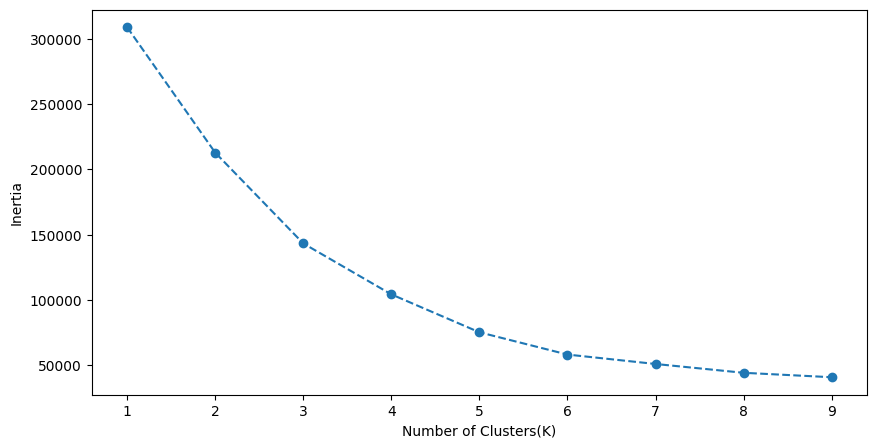

In [ ]:
#Melakukan visualiasi nilai cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X=df[['Age','Annual income','Spending score']]
max_k=10
inertia_values=[]
for k in range(1,max_k):
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,max_k),inertia_values,marker='o',linestyle='--')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


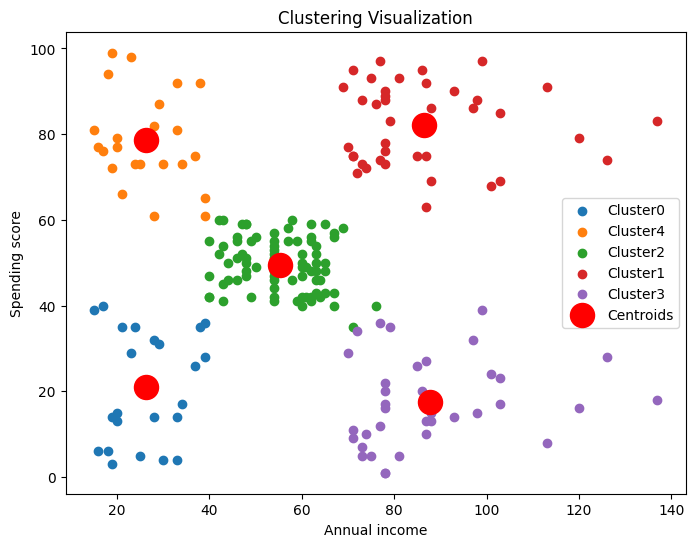

In [ ]:
#Melakukan clustering
n_clusters=5
kmeans=KMeans(n_clusters,random_state=0)
df['label']=kmeans.fit_predict(X)
plt.figure(figsize=(8,6))
for label in df['label'].unique():
  plt.scatter(df[df['label']==label] ['Annual income'],df[df['label']==label]['Spending score'],label=f'Cluster{label}')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=300,c='red',label='Centroids')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [ ]:
#Menggunakan matrik evaluasi silhoutte_score
from sklearn.metrics import silhouette_score
silhouette_scores={ }
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  silhouette_avg=silhouette_score(X,labels)
  silhouette_scores[k]=silhouette_avg
for k,silhoutte_avg in silhouette_scores.items():
  print(f"Silhoutte Score for k={k}:{silhoutte_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhoutte Score for k=2:0.293166070535953
Silhoutte Score for k=3:0.3839349967742105
Silhoutte Score for k=4:0.40546302077733304
Silhoutte Score for k=5:0.44428597560893024
Silhoutte Score for k=6:0.4523443947724053
Silhoutte Score for k=7:0.4412807576186172
Silhoutte Score for k=8:0.4280971079746162
Silhoutte Score for k=9:0.40126260157691634
Silhoutte Score for k=10:0.3790978814868016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Menggunakan metrik evaluasi davies_bouldin_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import  KMeans
dbi_scores={}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    labels=kmeans.fit_predict(X)
    dbi=davies_bouldin_score(X,labels)
    dbi_scores[k]=dbi

for k,dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}:{dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2:1.3571023143309133
Davies-Bouldin Index for k=3:0.8748062648492879
Davies-Bouldin Index for k=4:0.8914904209843165
Davies-Bouldin Index for k=5:0.8218781633199781
Davies-Bouldin Index for k=6:0.746974007275528
Davies-Bouldin Index for k=7:0.7863764854525301
Davies-Bouldin Index for k=8:0.8641438876447516
Davies-Bouldin Index for k=9:0.9070119449899816
Davies-Bouldin Index for k=10:0.9573604236246045


In [ ]:
#Menggunakan evaluasi metrik calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
chi_scores={}
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  chi=calinski_harabasz_score(X,labels)
  chi_scores[k]=chi

for k,chi in chi_scores.items():
  print(f"Calinski-Harabasz Index for k={k}:{chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2:89.28096999467428
Calinski-Harabasz Index for k=3:113.70507138642179
Calinski-Harabasz Index for k=4:127.9838294818919
Calinski-Harabasz Index for k=5:151.04386000160667
Calinski-Harabasz Index for k=6:166.7204931788687
Calinski-Harabasz Index for k=7:162.2852042279988
Calinski-Harabasz Index for k=8:163.58062876554533
Calinski-Harabasz Index for k=9:156.15508760692356
Calinski-Harabasz Index for k=10:152.26426170758603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
